# ATM Cash Demand Forecasting - Data Generation & EDA

## Week 1: Data Collection & Preprocessing

This notebook:
1. Generates synthetic ATM transaction data (12 months)
2. Performs Exploratory Data Analysis
3. Identifies patterns and seasonality
4. Prepares data for ML modeling

In [18]:
# Import required libraries
import sys
import os

# Add project root to path
# Navigate up from notebooks directory to project root
project_root = r'C:\Users\bdevr\Project\smart-atm-system'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Enable inline plotting for Jupyter
%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")
print(f"✓ Project root added to path: {project_root}")
print("✓ Matplotlib inline mode enabled")

✓ Libraries imported successfully
✓ Project root added to path: C:\Users\bdevr\Project\smart-atm-system
✓ Matplotlib inline mode enabled


## 1. Generate Synthetic Data

Generate 12 months of realistic ATM transaction data with:
- 4 different ATM locations
- Seasonal patterns
- Weekend/weekday variations
- Holiday effects
- Payday spikes

In [7]:
from ml_models.data_generator import ATMDataGenerator
import os

# Initialize generator
generator = ATMDataGenerator(num_atms=4, months=12, seed=42)

# Generate data
print("Generating 12 months of ATM transaction data...\n")

# Generate the dataframe
df = generator.generate_all_atms()

# Save to the correct path (relative to notebooks folder)
output_path = '../ml_models/data/atm_demand_data.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"\n✓ Data saved to {output_path}")
print(f"✓ Total records: {len(df)}")

# Display first few rows
print("\nFirst 5 records:")
df.head()

Generating 12 months of ATM transaction data...

Generating data for ATM Mall Plaza...
Generating data for ATM University...
Generating data for ATM Airport...
Generating data for ATM Hospital...

✓ Data saved to ../ml_models/data/atm_demand_data.csv
✓ Total records: 1444

First 5 records:


,date,atm_id,atm_name,location,location_type,total_demand,num_transactions,avg_transaction,day_of_week,day_name,is_weekend,is_holiday,is_month_end,is_payday,month,year,day_of_month,week_of_year
0,2024-11-08,1,ATM Mall Plaza,Shopping Mall,retail,107492.16,380,282.87,4,Friday,0,0,0,0,11,2024,8,45
1,2024-11-09,1,ATM Mall Plaza,Shopping Mall,retail,167926.62,704,238.53,5,Saturday,1,0,0,0,11,2024,9,45
2,2024-11-10,1,ATM Mall Plaza,Shopping Mall,retail,173169.53,764,226.66,6,Sunday,1,0,0,0,11,2024,10,45
3,2024-11-11,1,ATM Mall Plaza,Shopping Mall,retail,106716.06,470,227.06,0,Monday,0,0,0,0,11,2024,11,46
4,2024-11-12,1,ATM Mall Plaza,Shopping Mall,retail,96887.69,591,163.94,1,Tuesday,0,0,0,0,11,2024,12,46


In [8]:
# Display data info
print("Dataset Information:")
df.info()

print("\nDataset Shape:", df.shape)
print("\nDate Range:", df['date'].min(), "to", df['date'].max())
print("\nUnique ATMs:", df['atm_id'].nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1444 non-null   object 
 1   atm_id            1444 non-null   int64  
 2   atm_name          1444 non-null   object 
 3   location          1444 non-null   object 
 4   location_type     1444 non-null   object 
 5   total_demand      1444 non-null   float64
 6   num_transactions  1444 non-null   int64  
 7   avg_transaction   1444 non-null   float64
 8   day_of_week       1444 non-null   int64  
 9   day_name          1444 non-null   object 
 10  is_weekend        1444 non-null   int64  
 11  is_holiday        1444 non-null   int64  
 12  is_month_end      1444 non-null   int64  
 13  is_payday         1444 non-null   int64  
 14  month             1444 non-null   int64  
 15  year              1444 non-null   int64  
 16  day_of_month      144

## 2. Exploratory Data Analysis

In [9]:
# Summary statistics
print("Summary Statistics for Total Demand:")
df[['total_demand', 'num_transactions', 'avg_transaction']].describe()

Summary Statistics for Total Demand:


,total_demand,num_transactions,avg_transaction
count,1444.000000,1444.000000,1444.000000
mean,102878.147133,425.331025,252.730007
std,61570.705625,279.995998,49.997421
min,29635.130000,87.000000,99.070000
25%,54341.935000,226.750000,219.387500
50%,83371.085000,331.000000,252.895000
75%,138727.235000,551.000000,285.420000
max,416768.110000,2162.000000,443.020000


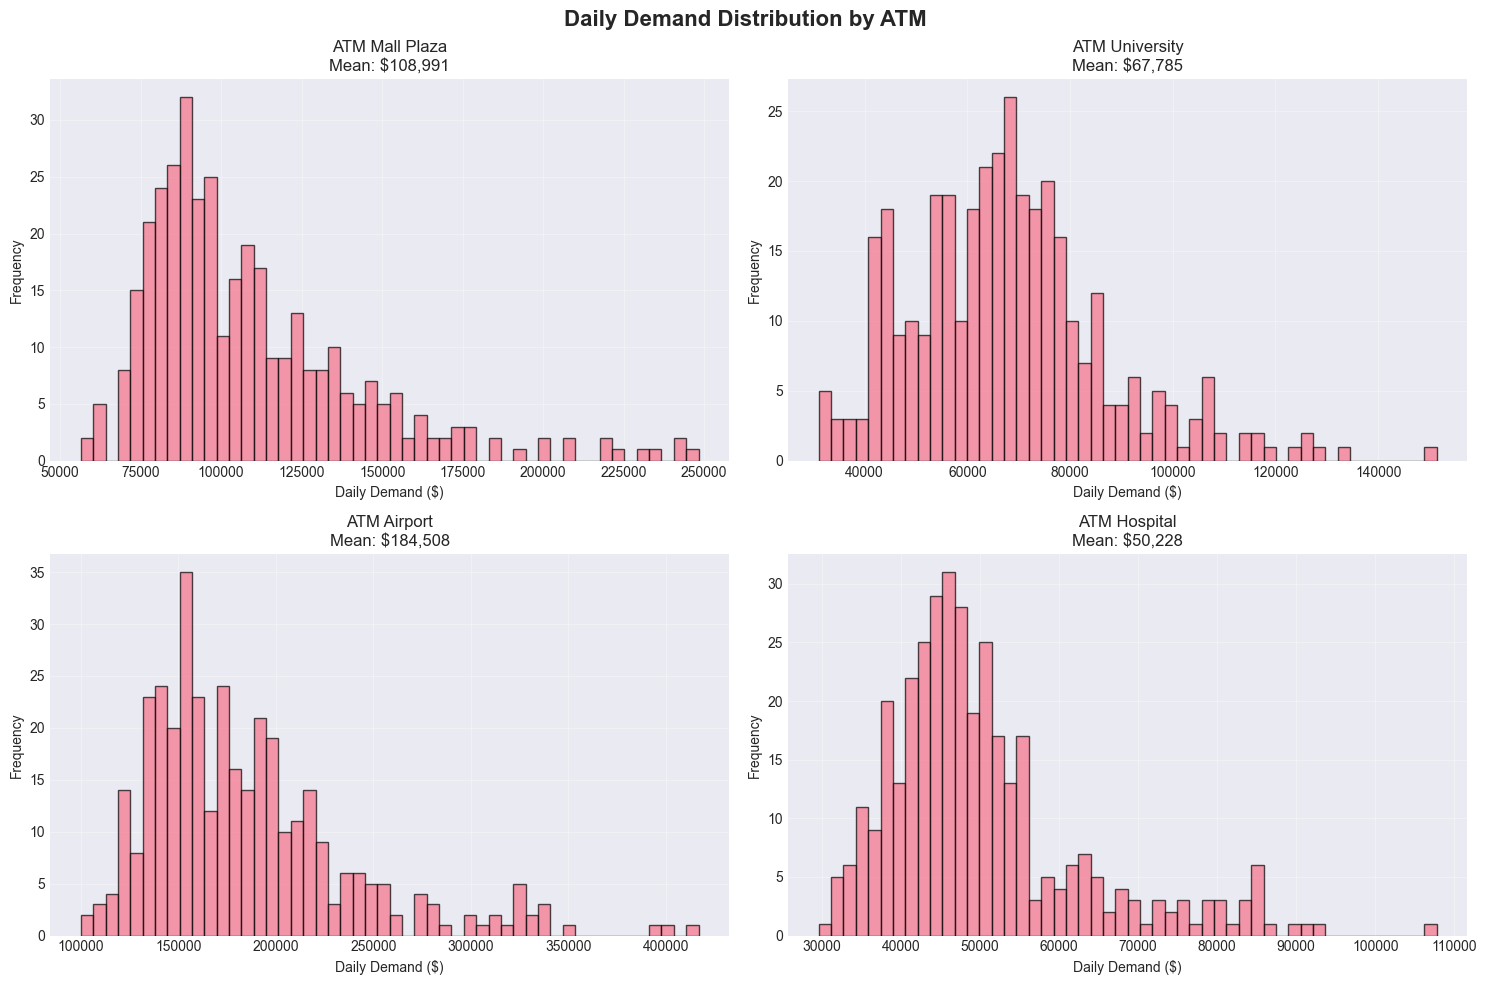

In [19]:
# Demand by ATM
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Daily Demand Distribution by ATM', fontsize=16, fontweight='bold')

for idx, (atm_id, atm_name) in enumerate(df[['atm_id', 'atm_name']].drop_duplicates().values):
    ax = axes[idx // 2, idx % 2]
    atm_data = df[df['atm_id'] == atm_id]['total_demand']
    
    ax.hist(atm_data, bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(f'{atm_name}\nMean: ${atm_data.mean():,.0f}', fontsize=12)
    ax.set_xlabel('Daily Demand ($)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

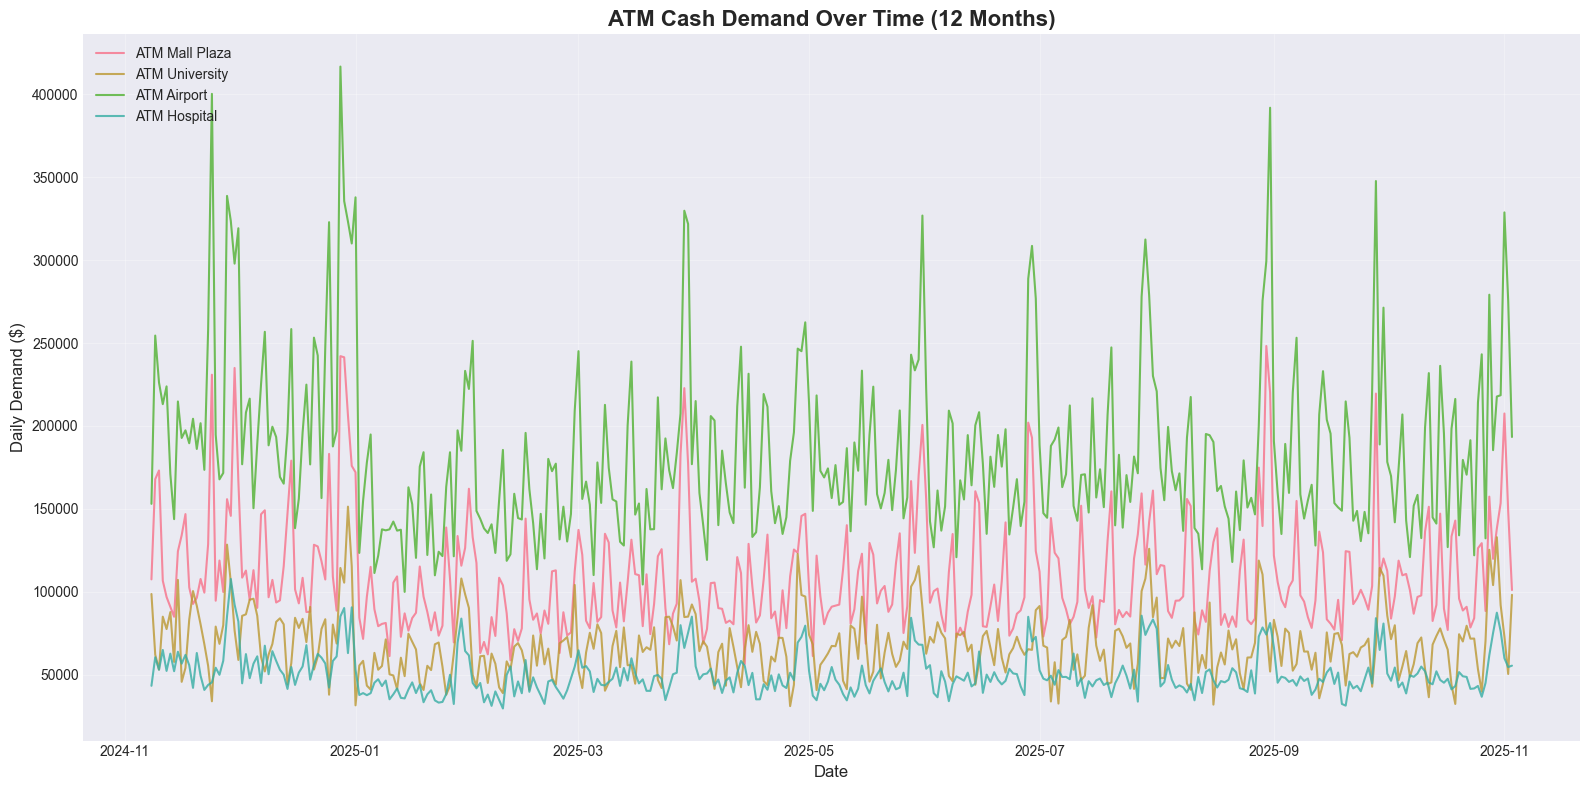

In [11]:
# Time series plot for all ATMs
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(16, 8))
for atm_id in df['atm_id'].unique():
    atm_data = df[df['atm_id'] == atm_id].sort_values('date')
    atm_name = atm_data['atm_name'].iloc[0]
    plt.plot(atm_data['date'], atm_data['total_demand'], label=atm_name, linewidth=1.5, alpha=0.8)

plt.title('ATM Cash Demand Over Time (12 Months)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Demand ($)', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Pattern Analysis

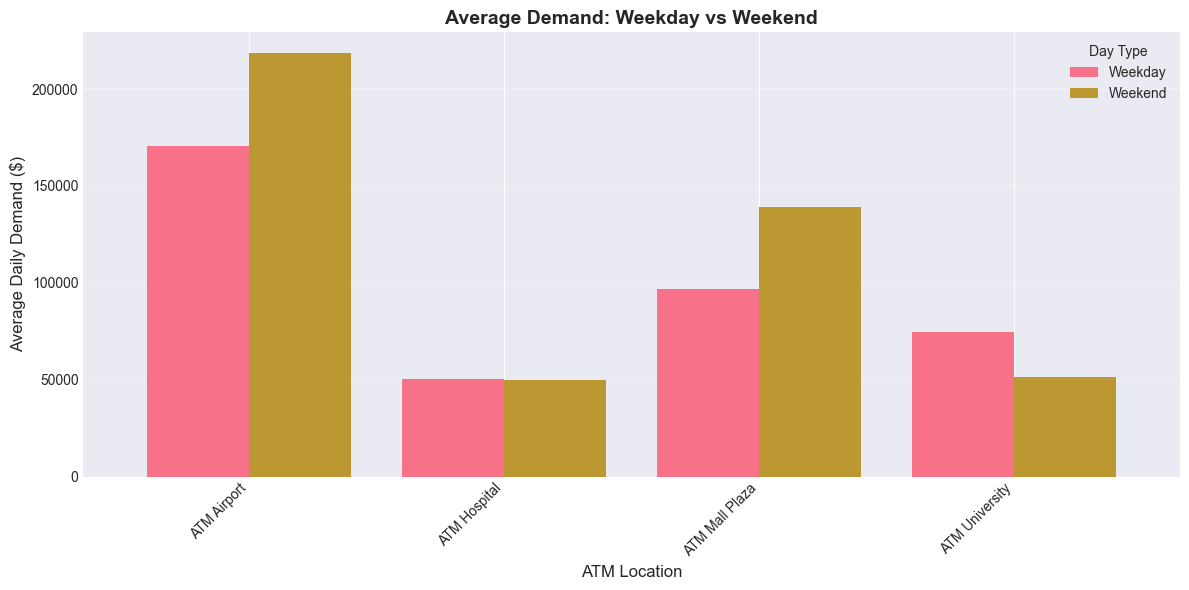


Weekend vs Weekday Demand:
                      Weekday        Weekend
atm_name                                    
ATM Airport     170804.005019  218373.398077
ATM Hospital     50383.532918   49843.557788
ATM Mall Plaza   96705.141673  139351.451346
ATM University   74476.354514   51250.849423


In [12]:
# Weekend vs Weekday analysis
weekend_comparison = df.groupby(['atm_name', 'is_weekend'])['total_demand'].mean().unstack()
weekend_comparison.columns = ['Weekday', 'Weekend']

ax = weekend_comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
ax.set_title('Average Demand: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax.set_xlabel('ATM Location', fontsize=12)
ax.set_ylabel('Average Daily Demand ($)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Day Type')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nWeekend vs Weekday Demand:")
print(weekend_comparison)

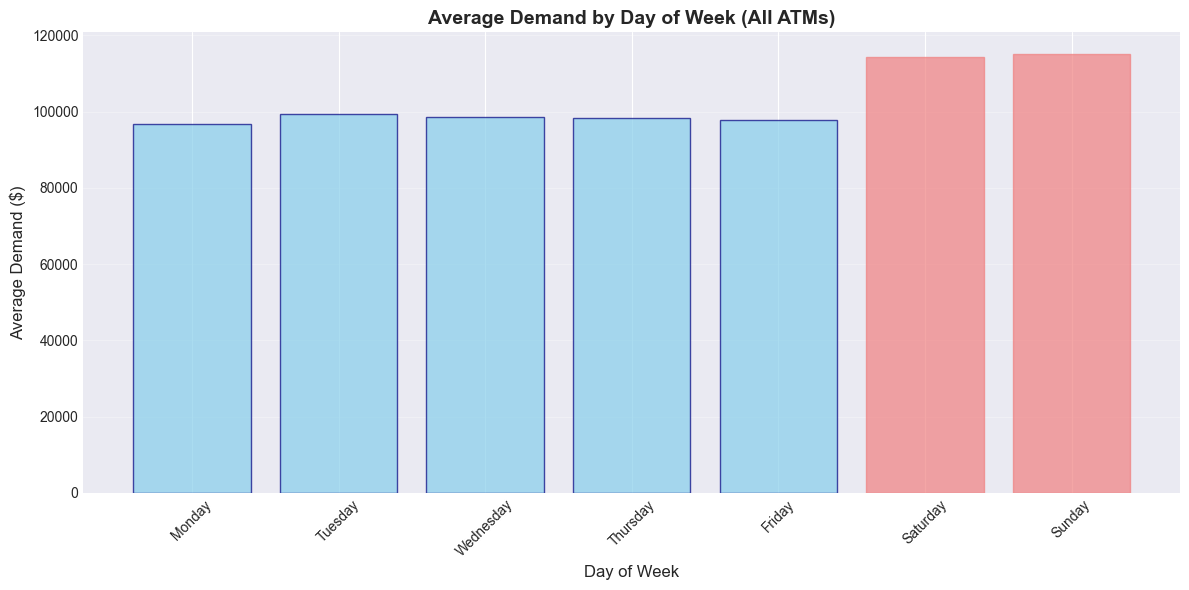

In [13]:
# Day of week patterns
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_demand = df.groupby('day_of_week')['total_demand'].mean()

plt.figure(figsize=(12, 6))
bars = plt.bar(range(7), dow_demand.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xticks(range(7), day_names, rotation=45)
plt.title('Average Demand by Day of Week (All ATMs)', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Demand ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Highlight weekends
bars[5].set_color('lightcoral')
bars[6].set_color('lightcoral')

plt.tight_layout()
plt.show()

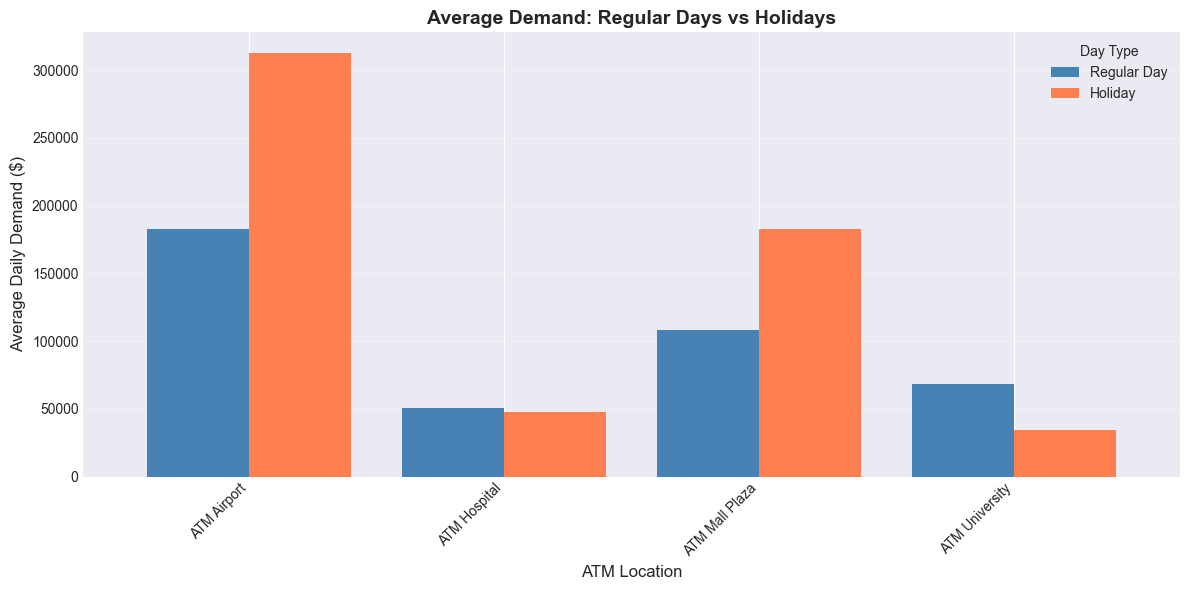


Holiday Impact:
                  Regular Day      Holiday
atm_name                                  
ATM Airport     183076.497115  312288.3050
ATM Hospital     50258.428543   47509.7450
ATM Mall Plaza  108165.540560  182668.5925
ATM University   68160.169440   34332.7400

Holiday boost: atm_name
ATM Airport       70.6
ATM Hospital      -5.5
ATM Mall Plaza    68.9
ATM University   -49.6
dtype: float64%


In [14]:
# Holiday impact
holiday_impact = df.groupby(['atm_name', 'is_holiday'])['total_demand'].mean().unstack()
holiday_impact.columns = ['Regular Day', 'Holiday']

ax = holiday_impact.plot(kind='bar', figsize=(12, 6), width=0.8, color=['steelblue', 'coral'])
ax.set_title('Average Demand: Regular Days vs Holidays', fontsize=14, fontweight='bold')
ax.set_xlabel('ATM Location', fontsize=12)
ax.set_ylabel('Average Daily Demand ($)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Day Type')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nHoliday Impact:")
print(holiday_impact)
print(f"\nHoliday boost: {((holiday_impact['Holiday'] / holiday_impact['Regular Day'] - 1) * 100).round(1)}%")

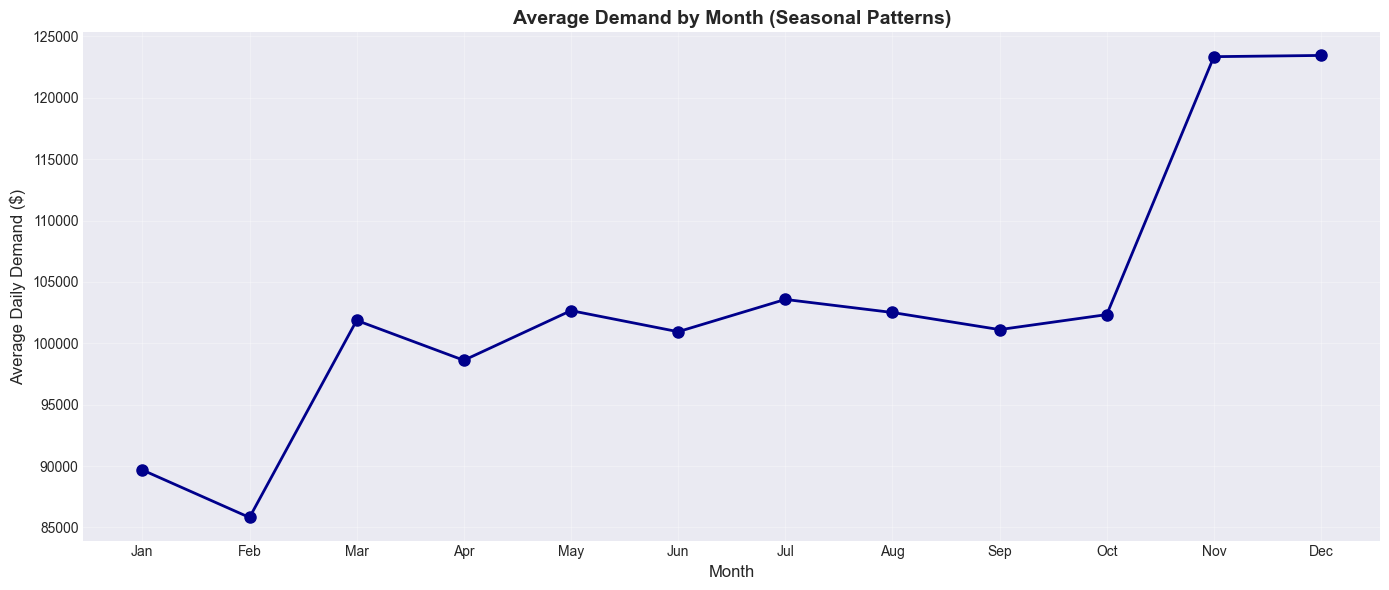

In [15]:
# Monthly seasonality
monthly_demand = df.groupby('month')['total_demand'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))
plt.plot(range(1, 13), monthly_demand.values, marker='o', linewidth=2, markersize=8, color='darkblue')
plt.xticks(range(1, 13), month_names)
plt.title('Average Demand by Month (Seasonal Patterns)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Demand ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

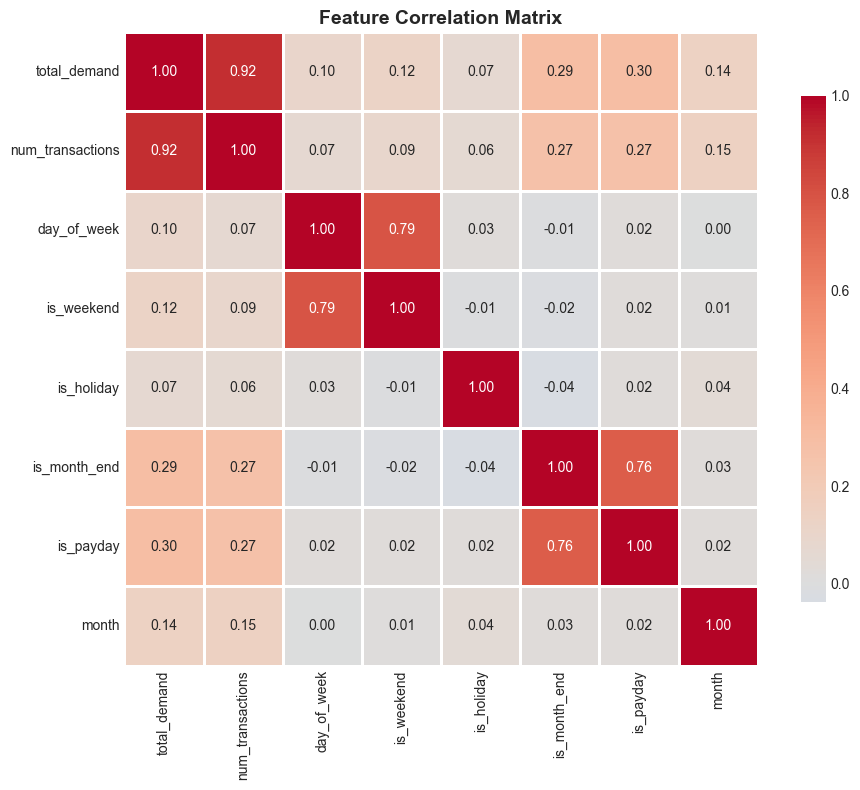

In [16]:
# Correlation heatmap
correlation_cols = ['total_demand', 'num_transactions', 'day_of_week', 'is_weekend', 
                    'is_holiday', 'is_month_end', 'is_payday', 'month']

plt.figure(figsize=(10, 8))
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Export for ML Modeling

In [17]:
# Save processed data
output_file = '../ml_models/data/atm_demand_data.csv'
df.to_csv(output_file, index=False)
print(f"✓ Data saved to {output_file}")

# Summary report
print("\n" + "="*60)
print("DATA GENERATION & EDA COMPLETE")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"ATMs: {df['atm_id'].nunique()}")
print(f"Average daily demand: ${df['total_demand'].mean():,.0f}")
print(f"Total data points per ATM: {len(df) // df['atm_id'].nunique()}")
print("\nKey Findings:")
print("  • Strong weekend patterns detected")
print("  • Holiday effects vary by location type")
print("  • Seasonal trends present (higher in Nov-Dec)")
print("  • Payday spikes clearly visible")
print("\n✓ Ready for ML model training!")
print("="*60)

✓ Data saved to ../ml_models/data/atm_demand_data.csv

DATA GENERATION & EDA COMPLETE
Total records: 1,444
Date range: 2024-11-08 00:00:00 to 2025-11-03 00:00:00
ATMs: 4
Average daily demand: $102,878
Total data points per ATM: 361

Key Findings:
  • Strong weekend patterns detected
  • Holiday effects vary by location type
  • Seasonal trends present (higher in Nov-Dec)
  • Payday spikes clearly visible

✓ Ready for ML model training!
